In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/airlines_flights_data.csv')

In [ ]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
# Cleaning Data

df.drop(columns = 'index',inplace = True)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
# Get some info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
# Find any null value

df.isna().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [ ]:
# Get statistical summary about the dataset

df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


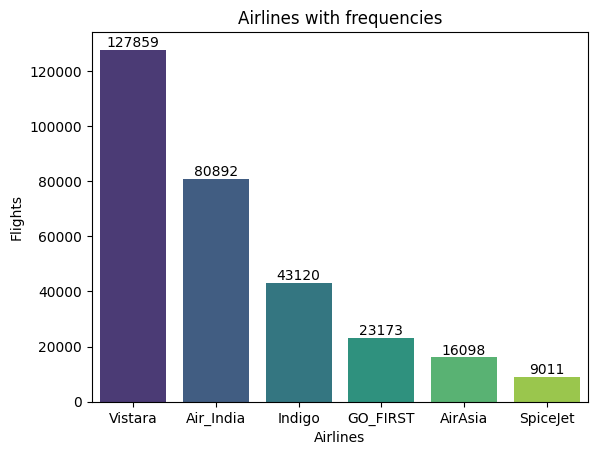

In [ ]:
# What are the airlines in the dataset accompanied by their frequency


result = df['airline'].value_counts().sort_values(ascending = False)


sns.barplot(
    x = result.index,
    y = result.values,
    palette = 'viridis'
)

plt.title('Airlines with frequencies')
plt.xlabel('Airlines')
plt.ylabel('Flights')
for i , v in enumerate(result.values):
  plt.text(i,v+1000,str(v),ha = 'center')

plt.show()

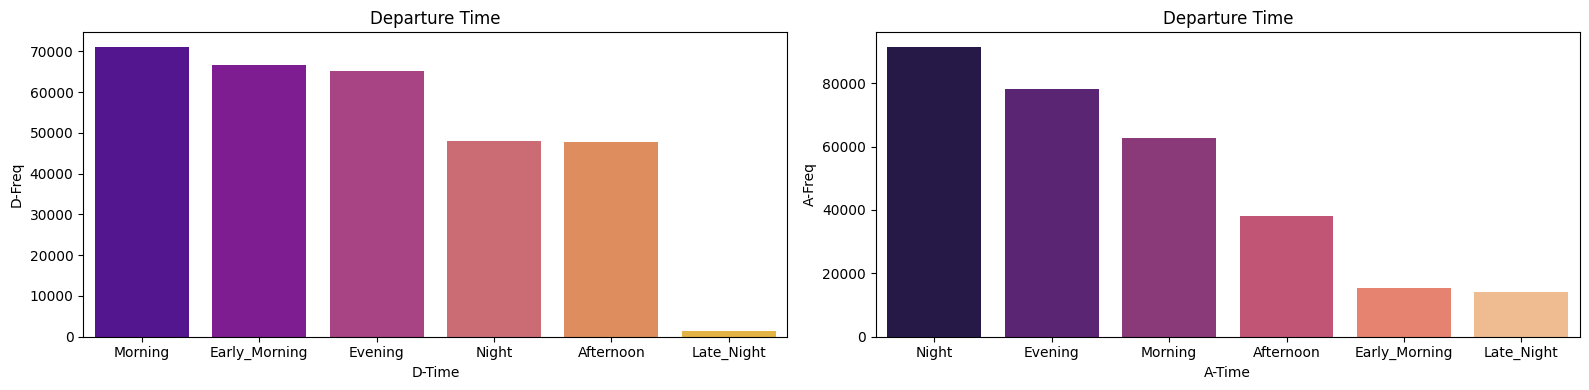

In [ ]:
# Show bar graph representing the departure time and arrival time

df.head(2)
dep_time = df['departure_time'].value_counts()
arr_time = df['arrival_time'].value_counts()

plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sns.barplot(
    x = dep_time.index,
    y = dep_time.values,
    palette = 'plasma'
)
plt.title('Departure Time')
plt.xlabel('D-Time')
plt.ylabel('D-Freq')



plt.subplot(1,2,2)
sns.barplot(
    x = arr_time.index,
    y = arr_time.values,
    palette = 'magma'
)
plt.title('Departure Time')
plt.xlabel('A-Time')
plt.ylabel('A-Freq')

plt.tight_layout()
plt.show()

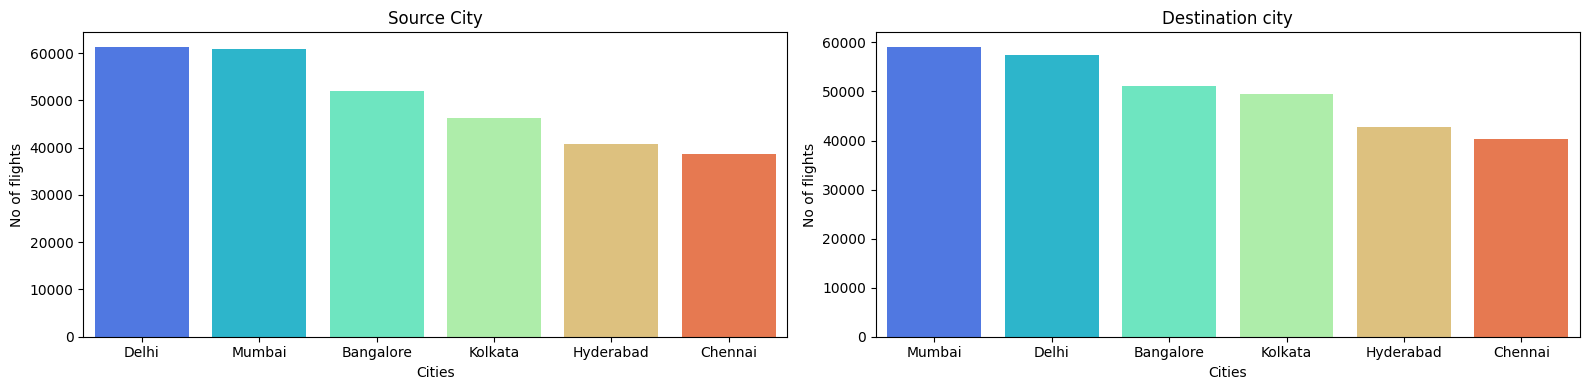

In [ ]:
# Show bar graphs representing the source city & destination city


df.head(2)
sour_city = df['source_city'].value_counts()
dest_city = df['destination_city'].value_counts()

plt.figure(figsize = (16,4))
plt.subplot(1,2,2)
sns.barplot(
    x = dest_city.index,
    y = dest_city.values,
    palette = 'rainbow'
)
plt.title('Destination city')
plt.xlabel('Cities')
plt.ylabel('No of flights')



plt.subplot(1,2,1)
sns.barplot(
    x = sour_city.index,
    y = sour_city.values,
    palette = 'rainbow'
)
plt.title('Source City')
plt.xlabel('Cities')
plt.ylabel('No of flights')

plt.tight_layout()
plt.show()


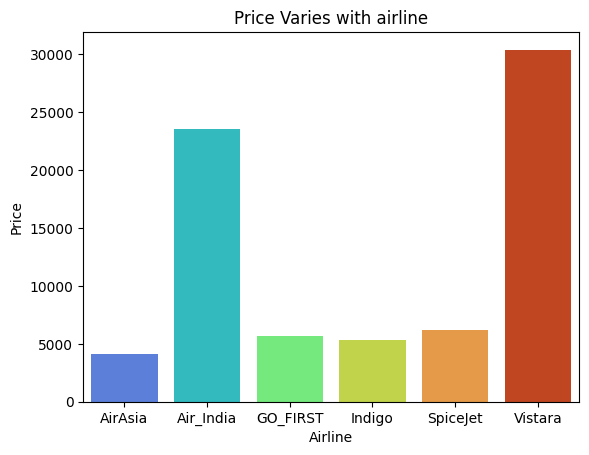

In [ ]:
# Does price varies with airline

result = df.groupby('airline')['price'].mean().round(2)


sns.barplot(
    x = result.index,
    y = result.values,
    palette = 'turbo'
)

plt.title('Price Varies with airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

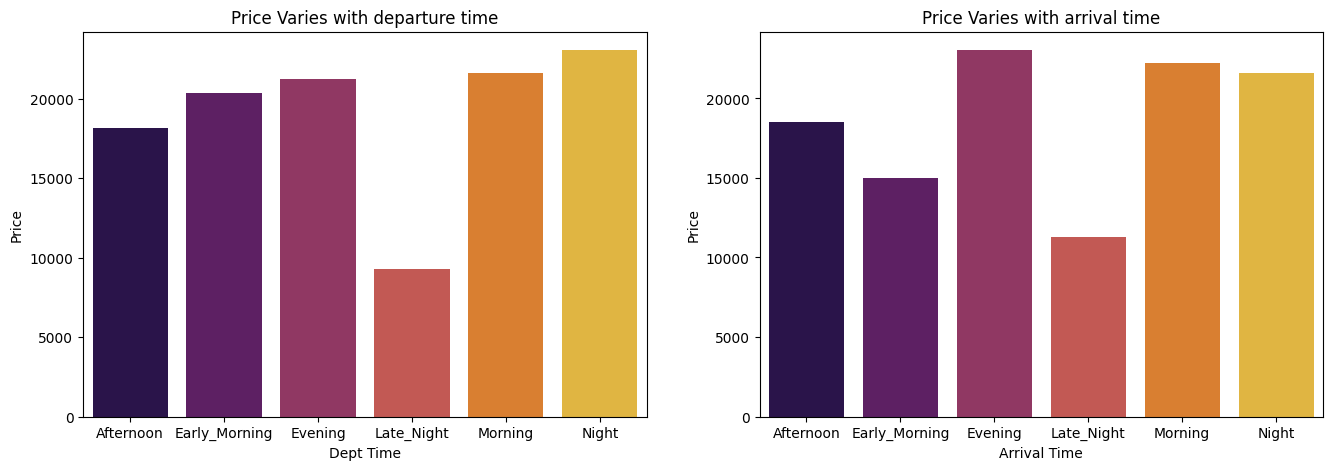

In [ ]:
# Does ticket price change based on the departure time and arrival

dept_time_price = df.groupby('departure_time')['price'].mean().round(2)
arr_time_price = df.groupby('arrival_time')['price'].mean().round(2)


plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.barplot(
    x = dept_time_price.index,
    y = dept_time_price.values,
    palette = 'inferno'
)

plt.title('Price Varies with departure time')
plt.xlabel('Dept Time')
plt.ylabel('Price')


plt.subplot(1,2,2)
sns.barplot(
    x = arr_time_price.index,
    y = arr_time_price.values,
    palette = 'inferno'
)

plt.title('Price Varies with arrival time')
plt.xlabel('Arrival Time')
plt.ylabel('Price')


plt.show()


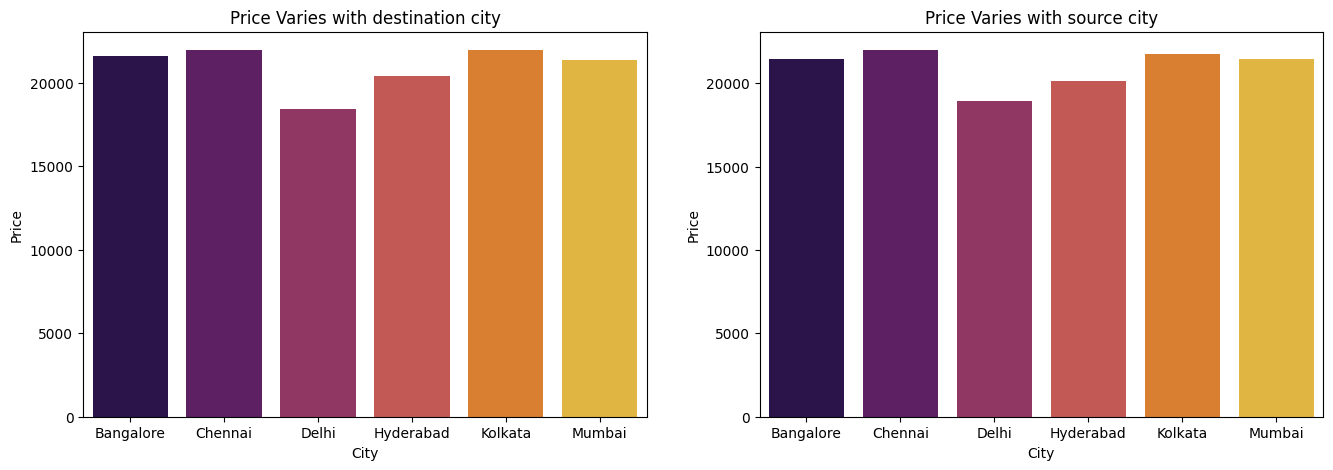

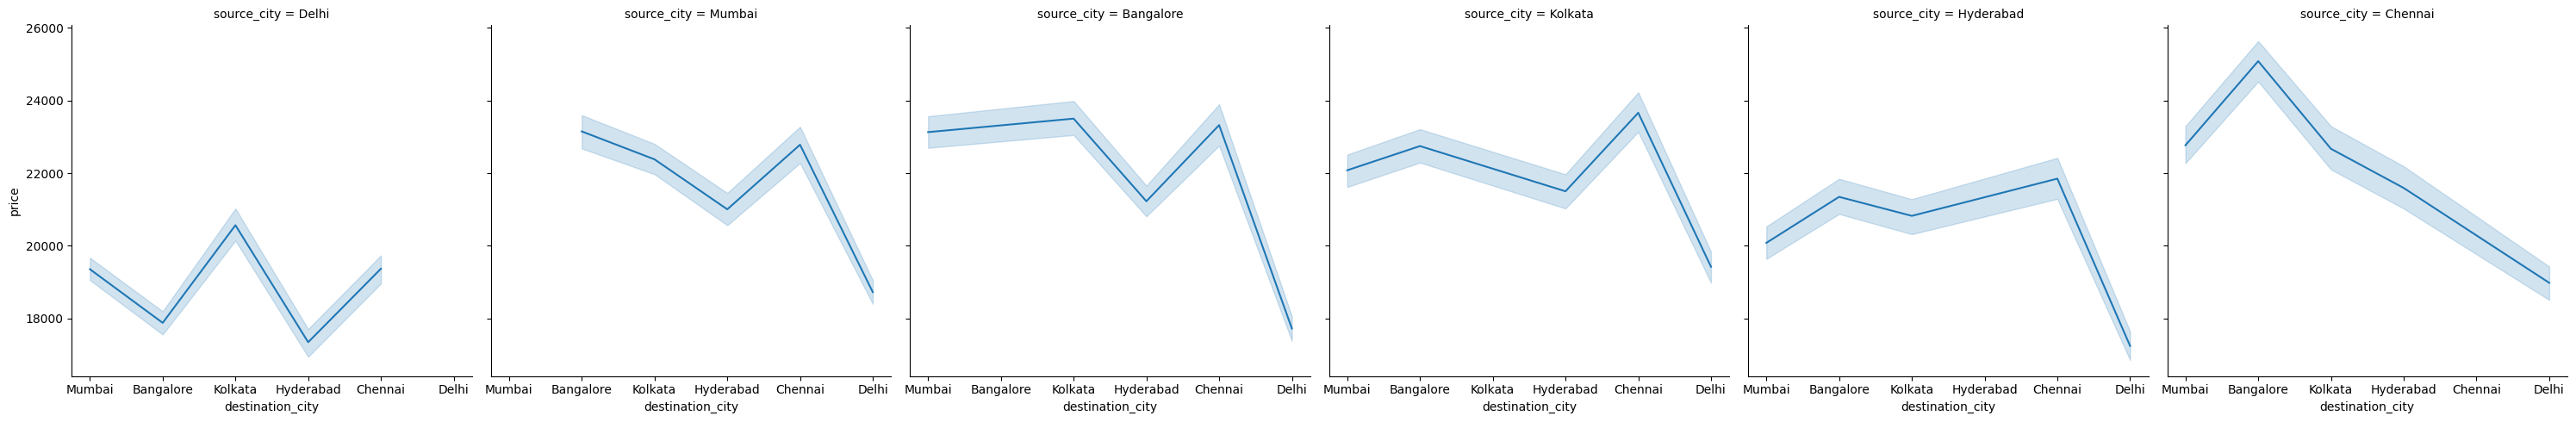

In [ ]:
# How the price change with change in source and destination

sour_price = df.groupby('source_city')['price'].mean().round(2)
dept_price = df.groupby('destination_city')['price'].mean().round(2)


plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.barplot(
    x = dept_price.index,
    y = dept_price.values,
    palette = 'inferno'
)

plt.title('Price Varies with destination city')
plt.xlabel('City')
plt.ylabel('Price')


plt.subplot(1,2,2)
sns.barplot(
    x = sour_price.index,
    y = sour_price.values,
    palette = 'inferno'
)

plt.title('Price Varies with source city')
plt.xlabel('City')
plt.ylabel('Price')



sns.relplot(x = 'destination_city' , y = 'price',data = df , col = 'source_city',kind = 'line')
plt.show()


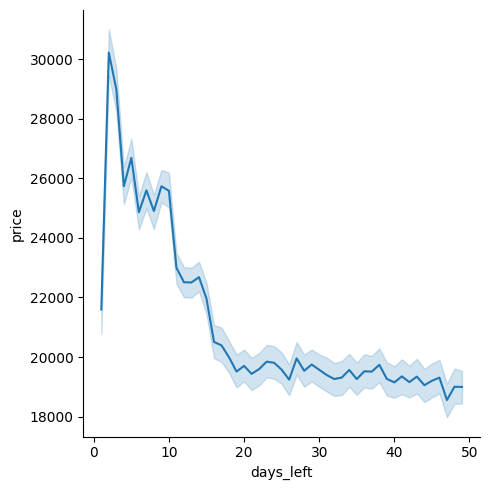

In [ ]:
# How is price affected when tickets are bought in just 1 or 2 days before departure

df.head()

result = df.groupby('days_left')['price'].mean().round(2)

sns.relplot(x = 'days_left' , y = 'price' , data = df , kind = 'line')

plt.show()

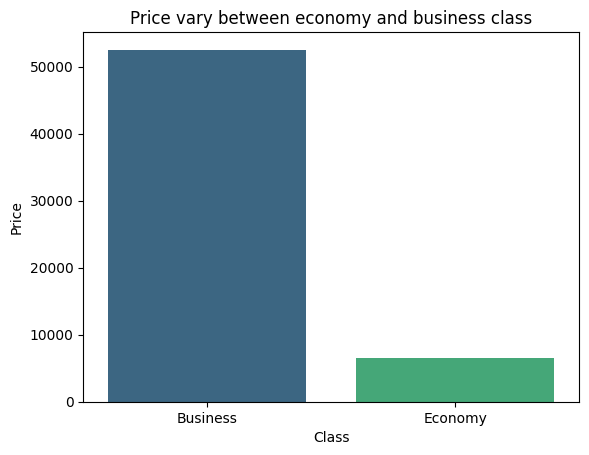

In [ ]:
# How does the ticket price vary between economy and business class

class_price = df.groupby('class')['price'].mean().round(2)

sns.barplot(
    x = class_price.index,
    y = class_price.values,
    palette = 'viridis'
)

plt.title('Price vary between economy and business class')
plt.xlabel('Class')
plt.ylabel('Price')

plt.show()

In [ ]:
 # What will be the average price of vistara airline for a flight from delhi to hyderabad in business class

new_data = df[(df['airline'] == 'Vistara') & (df['source_city']=='Delhi') & (df['destination_city']=='Hyderabad') & (df['class']=='Business')]

result = new_data['price'].mean().round(2)
print(f'Price of vistara airline for a flight from delhi to hyderabad in business class is {result}rs')

Price of vistara airline for a flight from delhi to hyderabad in business class is 47939.84rs
